In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure

In [3]:
# Load dataset and show all rows
df = pd.read_csv("credit_risk_dataset.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# getting shape of dataset
df.shape

(32581, 12)

In [5]:
# checking datatypes
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [8]:
# Describe Data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Checking for Null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Check Null values in relation to all values of a column
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(df)

,Missing Values,% of Total Values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,2.747000
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,9.563856
loan_status,0,0.000000
loan_percent_income,0,0.000000


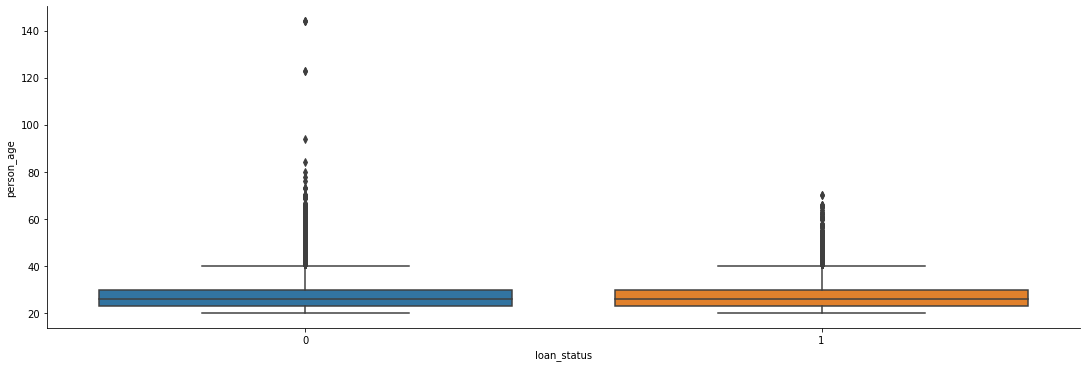

In [32]:
sns.catplot(y="person_age", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

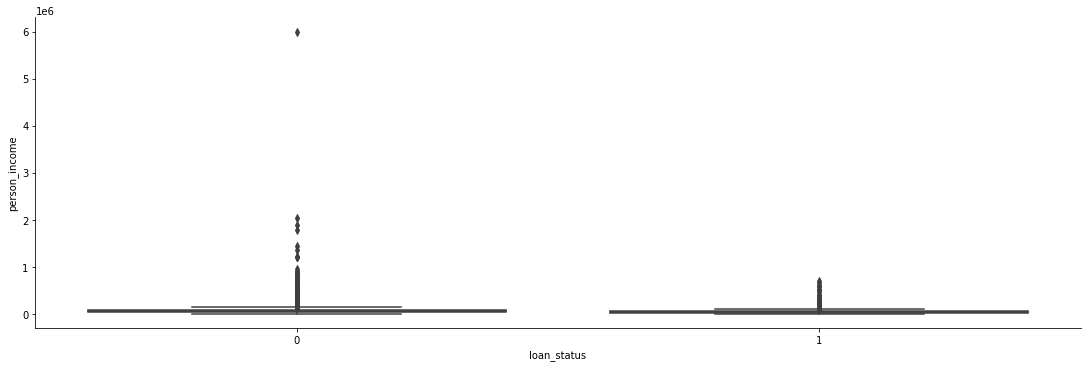

In [37]:
sns.catplot(y="person_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

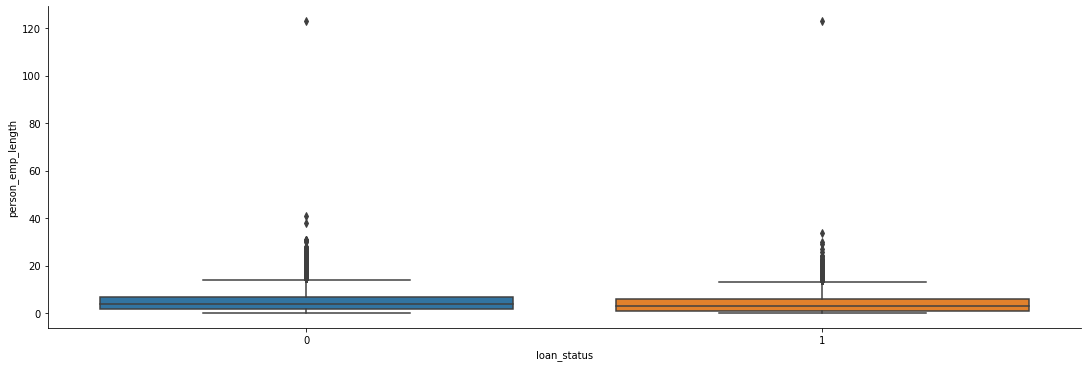

In [38]:
sns.catplot(y="person_emp_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

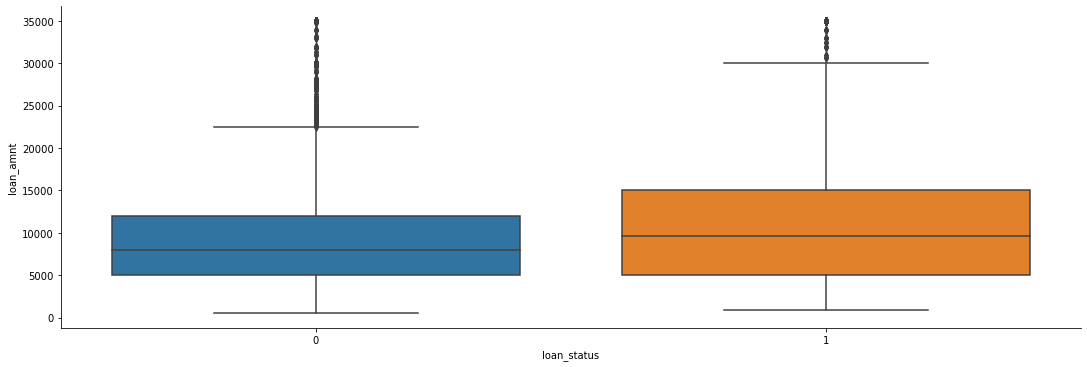

In [39]:
sns.catplot(y="loan_amnt", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

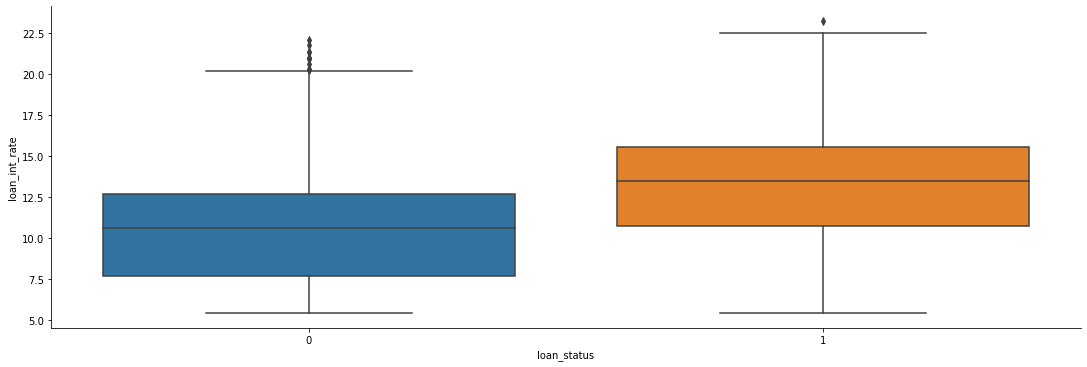

In [41]:
sns.catplot(y="loan_int_rate", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

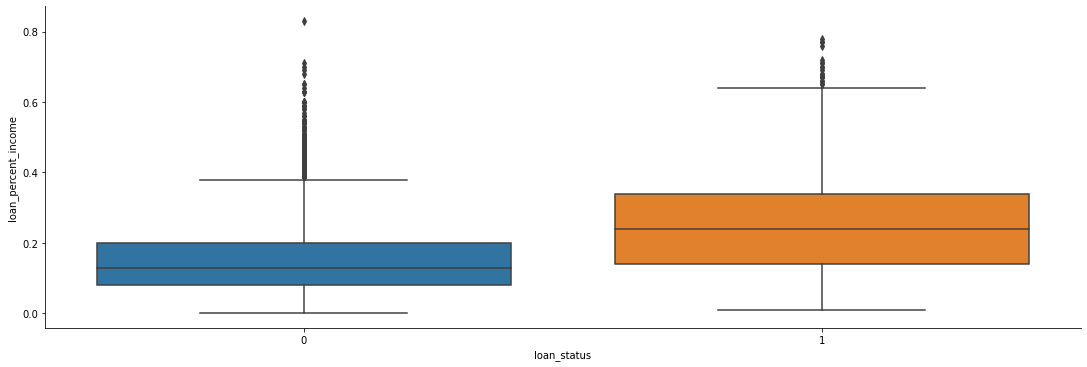

In [42]:
sns.catplot(y="loan_percent_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

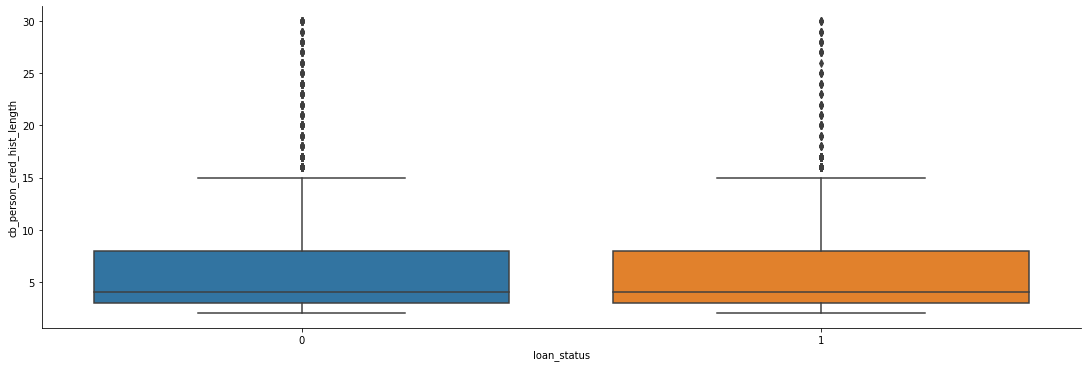

In [43]:
sns.catplot(y="cb_person_cred_hist_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [49]:
df[df['loan_int_rate']>20]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.03,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.16,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.03,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.11,1,0.31,Y,2
1827,24,30000,RENT,5.0,MEDICAL,G,2000,21.27,1,0.07,Y,3
2436,22,23000,RENT,1.0,MEDICAL,F,2800,21.74,1,0.12,N,4
2620,22,37000,RENT,2.0,DEBTCONSOLIDATION,E,3000,20.30,1,0.08,N,2
2897,22,35000,MORTGAGE,NaN,VENTURE,F,5000,21.36,0,0.14,Y,2


In [46]:
df[df['loan_percent_income']>0.7]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
460,24,18000,OWN,6.0,PERSONAL,A,13000,7.88,1,0.72,N,3
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,1,0.77,N,2
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,1,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0,0.83,N,3
2452,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4
10007,21,13000,RENT,0.0,DEBTCONSOLIDATION,C,9250,12.53,1,0.71,N,3
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,1,0.76,N,5
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,1,0.78,N,6
27878,33,10080,OWN,11.0,VENTURE,A,7200,6.03,1,0.71,N,8


In [45]:
# removing outliers for person_age > 100
# removing outliers for person_emp_length > 50
# removing outliers for person_income > 600k

In [33]:
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [10]:
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [14]:
df[df['person_income']>5000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [ ]:
# data does not seem plausible, so we can reomove these rows without doing a mistake

In [55]:
df_clean = df[(df['person_age']<=100)&(df['person_emp_length']<=50)&(df['person_income']<=5000000)]
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


<AxesSubplot:xlabel='person_age', ylabel='person_income'>

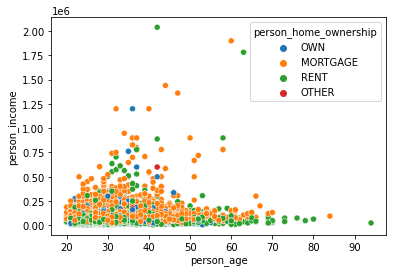

In [83]:
sns.scatterplot(data=df_clean, x="person_age", y="person_income", hue="person_home_ownership")

#plot1 <- ggplot(credit_risk, aes(person_age, person_income, col=person_home_ownership)) +
#  geom_point() + ylab("Income") + xlab("Age") + labs(color = "Home ownership: ") +
#  theme(legend.position="bottom") 
#ggExtra::ggMarginal(plot1, type = "boxplot")

In [ ]:
plot2 <- ggplot(credit_risk, aes(loan_amnt, loan_int_rate, col=loan_intent)) +
  geom_point() + ylab("Interest rate") + xlab("Loan Amount") + labs(color = "Loan Intent: ") +
  theme(legend.position="bottom") 
ggExtra::ggMarginal(plot2, type = "boxplot")


In [ ]:
plot3 <- ggplot(credit_risk, aes(loan_amnt, person_income, col=loan_grade)) +
  geom_point() + ylab("Income") + labs(color = "Loan Grade: ") + theme(legend.position="bottom") +
  scale_color_manual(values=c("#66cc99", "#70F000", "#D0FF00", "#F3FF0F", "#FFDB4D", "#FFA64D", "#FF4D4D"))
ggExtra::ggMarginal(plot3, type = "boxplot")

In [ ]:
plot4 <- ggplot(credit_risk, aes(person_age, loan_int_rate, col=loan_grade)) +
  geom_point() + ylab("Interest rate") + xlab("Age") +  labs(color = "Loan Grade: ") +
theme(legend.position="bottom") + scale_color_manual(values=c("#66cc99", "#70F000", "#D0FF00", "#F3FF0F", "#FFDB4D", "#FFA64D", "#FF4D4D"))
ggExtra::ggMarginal(plot4, type = "boxplot")

In [ ]:
# Variable of interest

plot5 <- ggplot(credit_risk, aes(loan_percent_income, loan_int_rate, col= factor(loan_status, labels = c("Not default", "Default")))) +
  geom_point() + ylab("Interest rate") + xlab("Loan percent income") + labs(color = "Loan Status: ") + 
  theme(legend.position="bottom") + scale_color_manual(values=c("#66cc99", "#ff3366"))
ggExtra::ggMarginal(plot5, type = "boxplot")

In [61]:
# Person_home_ownership
default_hist_status_tab = pd.crosstab(df_clean['person_home_ownership'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
person_home_ownership,,
MORTGAGE,11460,1630
OTHER,74,33
OWN,2243,167
RENT,11077,4995


In [80]:
# number of customers per home ownership
mortgage=intent_tab.iloc[0].sum()
other=intent_tab.iloc[1].sum()
own=intent_tab.iloc[2].sum()
rent=intent_tab.iloc[3].sum()
# number of customers per home ownership who default
mortgage_default=intent_tab.iloc[0,1].sum()
other_default=intent_tab.iloc[1,1].sum()
own_default=intent_tab.iloc[2,1].sum()
rent_default=intent_tab.iloc[3,1].sum()
# % number of customers per home ownership who default
mortgage_pers= round(mortgage_default / mortgage * 100, 2)
other_pers= round(other_default / other * 100, 2)
own_pers= round(own_default / own * 100, 2)
rent_pers= round(rent_default / rent * 100, 2)
print("{} % of clients with a mortgage have defaulted.".format(mortgage_pers))
print("{} % of clients with other living situation have defaulted.".format(other_pers))
print("{} % of clients with a own home have defaulted.".format(own_pers))
print("{} % of clients with a rented home have defaulted.".format(rent_pers))

28.38 % of clients with a mortgage have defaulted.
16.95 % of clients with other living situation have defaulted.
25.56 % of clients with a own home have defaulted.
26.54 % of clients with a rented home have defaulted.


In [ ]:
  geom_bar(position = "fill") +
  ylab("Home ownership %") + xlab("Default") + labs(fill = "Type of ownership:") +
  theme(legend.position="top", plot.background = element_rect(colour = "black", size = 1)) + 
  guides(fill = guide_legend(reverse=TRUE)) +
  coord_flip()

In [73]:
# Loan_intent
intent_tab = pd.crosstab(df_clean['loan_intent'], df_clean['loan_status'])
intent_tab

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3627,1437
EDUCATION,5222,1066
HOMEIMPROVEMENT,2613,897
MEDICAL,4332,1565
PERSONAL,4321,1046
VENTURE,4739,814


In [78]:
# number of customers per rason
debt_consolidation=intent_tab.iloc[0].sum()
education=intent_tab.iloc[1].sum()
homeimprovement=intent_tab.iloc[2].sum()
medical=intent_tab.iloc[3].sum()
personal=intent_tab.iloc[4].sum()
venture=intent_tab.iloc[5].sum()
# number of customers per lreason who default
debt_consolidation_default=intent_tab.iloc[0,1].sum()
education_default=intent_tab.iloc[1,1].sum()
homeimprovement_default=intent_tab.iloc[2,1].sum()
medical_default=intent_tab.iloc[3,1].sum()
personal_default=intent_tab.iloc[4,1].sum()
venture_default=intent_tab.iloc[5,1].sum()
# % number of customers per reason who default
debt_consolidation_pers= round(debt_consolidation_default / debt_consolidation * 100, 2)
education_pers= round(education_default / education * 100, 2)
homeimporvement_pers= round(homeimprovement_default / homeimprovement * 100, 2)
medical_pers= round(medical_default / medical * 100, 2)
personal_pers= round(personal_default / personal * 100, 2)
venture_pers= round(venture_default / venture * 100, 2)
print("{} % of clients with a loan for debt_consolidation have defaulted.".format(debt_consolidation_pers))
print("{} % of clients with a loan for education have defaulted.".format(education_pers))
print("{} % of clients with a loan for homeimprovement have defaulted.".format(homeimporvement_pers))
print("{} % of clients with a loan for medical have defaulted.".format(medical_pers))
print("{} % of clients with a loan for personal have defaulted.".format(personal_pers))
print("{} % of clients with a loan for venture have defaulted.".format(venture_pers))

28.38 % of clients with a loan for debt_consolidation have defaulted.
16.95 % of clients with a loan for education have defaulted.
25.56 % of clients with a loan for homeimprovement have defaulted.
26.54 % of clients with a loan for medical have defaulted.
19.49 % of clients with a loan for personal have defaulted.
14.66 % of clients with a loan for venture have defaulted.


In [ ]:
ggplot(credit_risk, aes(x = factor(loan_status), fill = factor(loan_intent))) +
  geom_bar(position = "fill") +
  ylab("Loan Intent") + xlab("Credit Default") + labs(fill = "Loan intent:") +
  theme(legend.position="top", plot.background = element_rect(colour = "black", size = 1)) + 
  guides(fill = guide_legend(reverse=TRUE)) +
  coord_flip()

In [76]:
# Loan_grade
loan_grade_tab = pd.crosstab(df_clean['loan_grade'], df_clean['loan_status'])
loan_grade_tab

loan_status,0,1
loan_grade,,
A,9379,991
B,8561,1622
C,5036,1283
D,1466,2089
E,341,611
F,70,166
G,1,63


In [79]:
# number of customers per loan grade
a_grade=loan_grade_tab.iloc[0].sum()
b_grade=loan_grade_tab.iloc[1].sum()
c_grade=loan_grade_tab.iloc[2].sum()
d_grade=loan_grade_tab.iloc[3].sum()
e_grade=loan_grade_tab.iloc[4].sum()
f_grade=loan_grade_tab.iloc[5].sum()
g_grade=loan_grade_tab.iloc[6].sum()
# number of customers per loan grade who default
a_grade_default=loan_grade_tab.iloc[0,1].sum()
b_grade_default=loan_grade_tab.iloc[1,1].sum()
c_grade_default=loan_grade_tab.iloc[2,1].sum()
d_grade_default=loan_grade_tab.iloc[3,1].sum()
e_grade_default=loan_grade_tab.iloc[4,1].sum()
f_grade_default=loan_grade_tab.iloc[5,1].sum()
g_grade_default=loan_grade_tab.iloc[6,1].sum()
# % number of customers per loan grade who default
a_pers= round(a_grade_default / a_grade * 100, 2)
b_pers= round(b_grade_default / b_grade * 100, 2)
c_pers= round(c_grade_default / c_grade * 100, 2)
d_pers= round(d_grade_default / d_grade * 100, 2)
e_pers= round(e_grade_default / e_grade * 100, 2)
f_pers= round(f_grade_default / f_grade * 100, 2)
g_pers= round(g_grade_default / g_grade * 100, 2)
print("{} % of clients with grade a have defaulted.".format(a_pers))
print("{} % of clients with grade b have defaulted.".format(b_pers))
print("{} % of clients with grade c have defaulted.".format(c_pers))
print("{} % of clients with grade d have defaulted.".format(d_pers))
print("{} % of clients with grade e have defaulted.".format(e_pers))
print("{} % of clients with grade f have defaulted.".format(f_pers))
print("{} % of clients with grade g have defaulted.".format(g_pers))

9.56 % of clients with grade a have defaulted.
15.93 % of clients with grade b have defaulted.
20.3 % of clients with grade c have defaulted.
58.76 % of clients with grade d have defaulted.
64.18 % of clients with grade e have defaulted.
70.34 % of clients with grade f have defaulted.
98.44 % of clients with grade g have defaulted.


In [ ]:
ggplot(credit_risk, aes(x = factor(loan_status), fill = factor(loan_grade))) +
  geom_bar(position = "fill") + scale_fill_manual(values=c("#66cc99", "#70F000", "#D0FF00", "#F3FF0F", "#FFDB4D", "#FFA64D", "#FF4D4D")) +
  ylab("Loan Grade") + xlab("Credit Default") + labs(fill = "Loan grade:") +
  theme(legend.position="top", plot.background = element_rect(colour = "black", size = 1)) + 
  guides(fill = guide_legend(reverse=TRUE)) +
  coord_flip()

In [66]:
# cb_person_default_on_file
default_hist_status_tab = pd.crosstab(df_clean['cb_person_default_on_file'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21340,4711
Y,3514,2114


In [67]:
# number of customers whith no bad history
no_history = default_hist_status_tab.iloc[0].sum()
print(no_history,"customers did not have a previous default history")
# customers with "bad credit" history
history = default_hist_status_tab.iloc[1].sum()
print(history,"customers had a previous default history")
# number of customers with no bad history who have defaulted
defaulted_no = default_hist_status_tab.iloc[0,1]
print(defaulted_no,"customers with no previous default history have defaulted")
# number of customers with bad history who have defaulted
defaulted_yes = default_hist_status_tab.iloc[1,1]
print(defaulted_yes,"customers who previously defaulted have defaulted again")
# % of clients with no bad history have defaulted
# % of clients with bad history have defaulted
defaulted_no_perc = round(defaulted_no / no_history * 100, 2)
defaulted_yes_perc = round(defaulted_yes / history * 100, 2)
print("{} % of clients with no previous default history have defaulted.".format(defaulted_no_perc))
print("And {} % of clients who had previously defaulted, defaulted again.".format(defaulted_yes_perc))

26051 customers did not have a previous default history
5628 customers had a previous default history
4711 customers with no previous default history have defaulted
2114 customers who previously defaulted have defaulted again
18.08 % of clients with no previous default history have defaulted.
And 37.56 % of clients who had previously defaulted, defaulted again.


In [68]:
# percentage of total defaults
total_default = round((defaulted_no+defaulted_yes) / (no_history+history) *100,2)
print("{}% of total clients population have defaulted.".format(total_default))

21.54% of total clients population have defaulted.


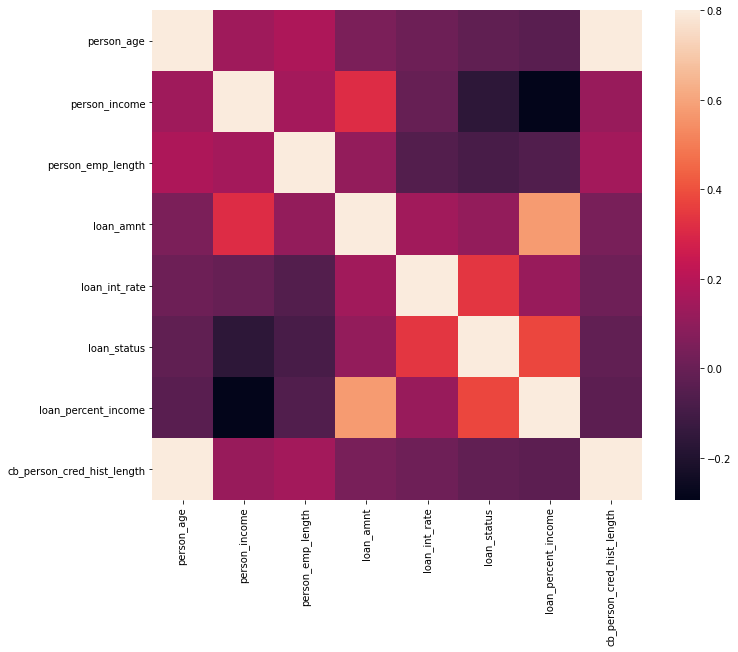

In [51]:
# Correlation matrix
corrmat = df_clean.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [52]:
df_clean.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000


In [ ]:
# to avoid multicollinearity, exclude person_age from model

In [ ]:
# What affects loan_grade?
# What affects loan amount?
# What affects loan interest rate?

### Logistic Regression

In [50]:
#### Logstic Regression
# We will build two models of logistic regression:
# 1.) Through replacing rows with Null values
# 2.) Filling Null values with Median/Mean